In [1]:
import pandas as pd
from m2p import PolyMaker
from rdkit import Chem

pm = PolyMaker()

# Generate Thermoplastics Using All Mechanisms

In [2]:
# create dataset
data = pd.DataFrame({'smiles':['C=C','C=CC','O=C(O)c1ccc(C(=O)O)cc1.OCCO','C=C.C=CC']},
                    index=['PE','PP','PET','PE-co-PP'])

# get monomers from smiiles strings
data['monomers'] = data.smiles.apply(lambda s: pm.get_monomers(s))

# polymerize 
data = pm.thermoplastic(data,DP=10,mechanism='all',replicate_structures=3)

# output
data.head(12)

100%|██████████| 12/12 [00:00<00:00, 12.87it/s]


,smiles,monomers,distribution,replicate_structure,smiles_polymer,mechanism
PE,C=C,"('C=C',)",[],0,CCCCCCCCCCCCCCCCCCCC,vinyl
PE-co-PP,C=C.C=CC,"('C=C', 'C=CC')",[],0,CCCCCCCCCCCC(C)CCCC(C)CCC(C)C(C)C,vinyl
PET,O=C(O)c1ccc(C(=O)O)cc1.OCCO,"('OCCO', 'O=C(O)c1ccc(C(=O)O)cc1')",[],0,O=C(O)c1ccc(C(=O)OCCOC(=O)c2ccc(C(=O)OCCOC(=O)...,ester
PP,C=CC,"('C=CC',)",[],0,CCCC(C)CCC(C)CC(C)CC(C)C(C)CCC(C)C(C)CC(C)CC(C)C,vinyl
PE,C=C,"('C=C',)",[],1,CCCCCCCCCCCCCCCCCCCC,vinyl
PE-co-PP,C=C.C=CC,"('C=C', 'C=CC')",[],1,CCCCCCCCCC(C)CCCC(C)CCCC(C)CC,vinyl
PET,O=C(O)c1ccc(C(=O)O)cc1.OCCO,"('OCCO', 'O=C(O)c1ccc(C(=O)O)cc1')",[],1,O=C(O)c1ccc(C(=O)OCCOC(=O)c2ccc(C(=O)OCCOC(=O)...,ester
PP,C=CC,"('C=CC',)",[],1,CCCC(C)CC(C)CCC(C)C(C)CC(C)CC(C)CCC(C)C(C)CC(C)C,vinyl
PE,C=C,"('C=C',)",[],2,CCCCCCCCCCCCCCCCCCCC,vinyl
PE-co-PP,C=C.C=CC,"('C=C', 'C=CC')",[],2,CCCCCCCCCCCCCCC(C)CCC(C)CCC,vinyl


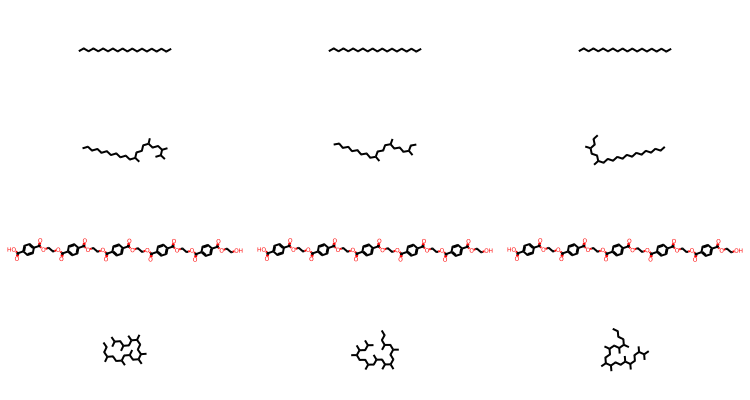

In [3]:
# draw
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in data.sort_index().smiles_polymer],molsPerRow=3, subImgSize=(250, 100))

# Generate Thermoplastics Using Different Distributions

In [52]:
# create dataset
data = pd.DataFrame().from_dict({'smiles':['C=C.C=CO','C=C.C=CO','C=C.C=CO','C=C.C=CO','C=C.C=CO'],

                                 'distribution':[[9,1],[4,1],[1,1],[1,4],[1,9]]})
data.index = ['EVOH']*data.shape[0]

# get monomers from smiiles strings
data['monomers'] = data.smiles.apply(lambda s: pm.get_monomers(s))

# polymerize 
data = pm.thermoplastic(data,DP=20,mechanism='vinyl',replicate_structures=1)

# output
data


100%|██████████| 5/5 [00:00<00:00, 14.73it/s]


,smiles,distribution,monomers,replicate_structure,smiles_polymer,mechanism
EVOH,C=C.C=CO,"[9, 1]","('C=C', 'C=CO')",0,CCCCCCCCCCCCCCCCC(O)CCCCCCCCCCCCCC(O)CCCCCCCCC,vinyl
EVOH,C=C.C=CO,"[4, 1]","('C=C', 'C=CO')",0,CCCCCCCCCCCCCCCCCCCCCCCCCCCCC(O)CC(O)CCCC(O)CC...,vinyl
EVOH,C=C.C=CO,"[1, 1]","('C=C', 'C=CO')",0,CCCC(O)CCCCCCCCCCCC(O)C(O)CCC(O)CCCCCCC(O)CCC(...,vinyl
EVOH,C=C.C=CO,"[1, 4]","('C=C', 'C=CO')",0,CC(O)C(O)CCC(O)C(O)CCC(O)CCC(O)CCC(O)CCCC(O)C(...,vinyl
EVOH,C=C.C=CO,"[1, 9]","('C=C', 'C=CO')",0,OCCCC(O)CC(O)CC(O)CCCC(O)C(O)CCC(O)CC(O)CC(O)C...,vinyl


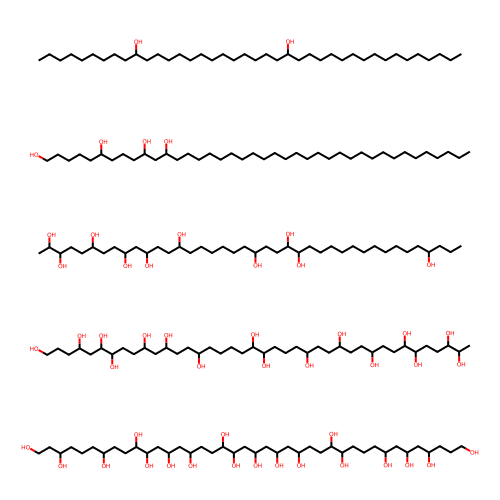

In [54]:
# draw
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in data.sort_index().smiles_polymer],molsPerRow=1, subImgSize=(500, 100))